In [ ]:
# ==========================================
# 📊 PROYECTO 2: MATEMÁTICAS PARA IA (NIVEL 1 & 2)
# ==========================================
# Objetivo: Analizar salud y hábitos de 1,000 pacientes.
# Conceptos: Promedio (Media), Mediana, Desviación Estándar, Pandas.

In [36]:
%pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------

In [25]:
%pip install pandas matplotlib numpy

  Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
Using cached pandas-2.3.3-cp314-cp314-win_amd64.whl (11.1 MB)
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   -------------------------------------- - 7.9/8.3 MB 42.9 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 36.8 MB/s  0:00:00
   ---------------------------------------- 0.0/12.4 MB ? eta -:--:--
   ---------------------------- ----------- 8.9/12.4 MB 46.2 MB/s eta 0:00:01
   ---------------------------------------- 12.4/12.4 MB 41.3 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 38.2 MB/s  0:00:00
Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl (7.1 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)

   ---------------------

In [26]:
#cargando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Cargamos los datos (Asegúrate de tener el archivo en la carpeta correcta)
# Si estás en Colab, sube el archivo a la izquierda.
# Si estás en VS Code local, usa la ruta relativa.
ruta_archivo = "data/dataset_registros.xlsx"
try:
    df = pd.read_excel(ruta_archivo)
    print("✅ Datos cargados correctamente.")
except FileNotFoundError:
    print("❌ Error: No encuentro el archivo. Verifica la ruta.")
    

✅ Datos cargados correctamente.


In [38]:
# --- NIVEL 1: MATEMÁTICAS PURAS (Sin Pandas) ---
# Antes de usar herramientas automáticas, entendamos las fórmulas.
# Vamos a calcular el PROMEDIO de Edad "a mano".

edades = df['Edad'].tolist() # Convertimos la columna a una lista simple de Python

# 1. Fórmula de la Media (Promedio): Suma de elementos / Cantidad de elementos
suma_total = 0
cantidad = 0

for edad in edades:
    suma_total += edad
    cantidad += 1

promedio_manual = suma_total / cantidad
print(f"Promedio calculado a mano: {promedio_manual:.2f} años")

Promedio calculado a mano: 44.20 años


Promedio calculado con NumPy: 44.20 años

--- ESTADÍSTICAS GENERALES ---
       ID_Paciente         Edad   Altura_cm     Peso_kg  Horas_Sueno  \
count  1000.000000  1000.000000  983.000000  982.000000   972.000000   
mean    500.500000    44.204000  174.904374   86.162118     7.055761   
std     288.819436    16.625787   17.276917   22.102591     1.904620   
min       1.000000    -5.000000   90.000000   10.000000     0.000000   
25%     250.750000    31.000000  163.000000   68.800000     5.500000   
50%     500.500000    45.000000  174.000000   86.850000     7.100000   
75%     750.250000    57.000000  187.000000  103.375000     8.600000   
max    1000.000000   120.000000  300.000000  250.000000    20.000000   

       Consumo_Agua_Litros  Nivel_Glucosa  
count           976.000000     986.000000  
mean              2.229508      89.675456  
std               1.200244      14.969483  
min               0.000000      30.000000  
25%               1.300000      81.000000  
50%           

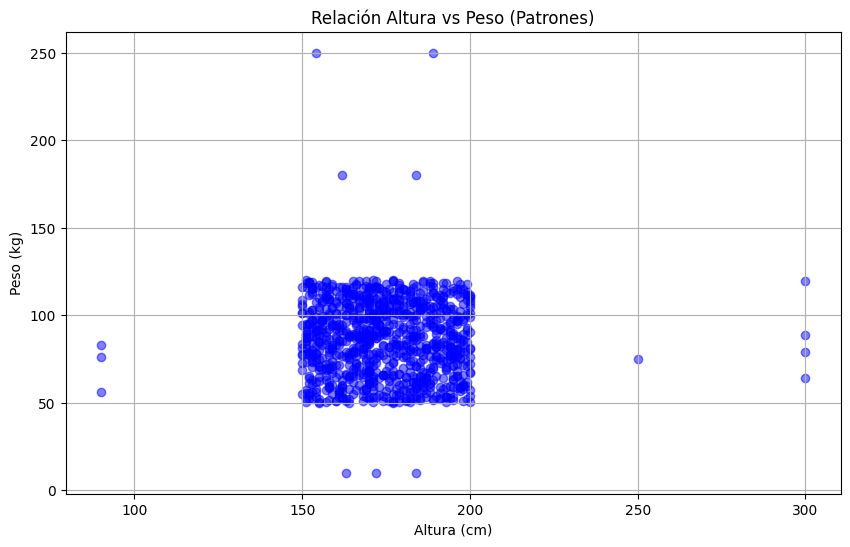


💡 CONCLUSIÓN VISUAL:
Observa la gráfica: ¿Ves una línea diagonal imaginaria?
Eso significa que hay CORRELACIÓN POSITIVA: A mayor altura, mayor peso.
Este es el principio básico que usan las IAs para predecir valores.


In [39]:
# 2. Verificación con NumPy (La forma rápida)
promedio_numpy = np.mean(edades)
print(f"Promedio calculado con NumPy: {promedio_numpy:.2f} años")

# ¡Deben ser iguales! Esto valida nuestra lógica matemática.

# --- NIVEL 2: EXPLORADOR DE DATOS (Con Pandas) ---
# Ahora usamos la potencia de la IA para analizar TODO el dataset.

print("\n--- ESTADÍSTICAS GENERALES ---")
# .describe() nos da un resumen matemático completo en un segundo
print(df.describe())

print("\n--- ANÁLISIS POR GÉNERO ---")
# Agrupamos los datos para encontrar patrones
grupo_genero = df.groupby("Genero")[["Altura_cm", "Peso_kg", "Nivel_Glucosa"]].mean()
print(grupo_genero)

# --- VISUALIZACIÓN BÁSICA ---
# Una imagen vale más que 1000 datos.
plt.figure(figsize=(10, 6))
plt.scatter(df['Altura_cm'], df['Peso_kg'], alpha=0.5, c='blue')
plt.title("Relación Altura vs Peso (Patrones)")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.grid(True)
plt.show()

print("\n💡 CONCLUSIÓN VISUAL:")
print("Observa la gráfica: ¿Ves una línea diagonal imaginaria?")
print("Eso significa que hay CORRELACIÓN POSITIVA: A mayor altura, mayor peso.")
print("Este es el principio básico que usan las IAs para predecir valores.")
